In [14]:
%load_ext autoreload
%autoreload 2
from yahpo_train.cont_normalization import ContNormalization
from yahpo_train.model  import *
from yahpo_gym import cfg
from yahpo_gym.benchmarks import lcbench

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
cfg = cfg("lcbench")
dls = dl_from_config(cfg)

In [16]:
f = FFSurrogateModel(dls, layers=[512,512], deeper = [], ps = [0., 0.])

In [17]:
l = SurrogateTabularLearner(dls, f, loss_func=nn.MSELoss(reduction='mean'), metrics=nn.MSELoss)
l.metrics = AvgTfedMetric(mean_absolute_error)

/home/flo/miniconda3/envs/yahpo/lib/python3.9/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.000237684027524665)

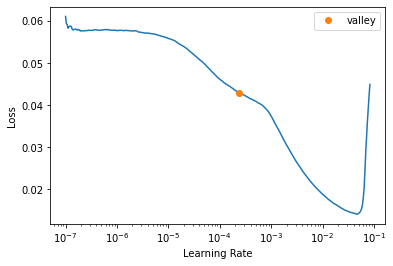

In [18]:
l.lr_find(num_it=500)

In [19]:
l.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.011124,0.010912,[1.45517586e+02 1.04445824e+01 2.49805254e-01 9.12827253e-02 1.76862448e-01 9.15963592e-02],01:47
1,0.005472,0.005403,[7.60966568e+01 7.32387117e+00 2.05150767e-01 6.02881635e-02 1.24366609e-01 6.05673191e-02],01:45


epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.002770,0.002792,[5.94913669e+01 5.05835613e+00 2.06943109e-01 4.02316429e-02 1.49938111e-01 3.99589922e-02],02:22


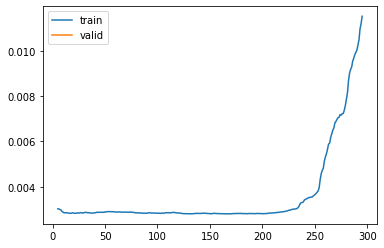

In [9]:
l.recorder.plot_loss()
l.fit_one_cycle(1, 1e-5)

In [13]:
import pandas as pd
pd.read_csv(cfg.get_path("dataset"))

,OpenML_task_id,epoch,batch_size,learning_rate,momentum,weight_decay,num_layers,max_units,max_dropout,time,val_accuracy,val_cross_entropy,val_balanced_accuracy,test_cross_entropy,test_balanced_accuracy
0,168868,1,71,0.001824,0.213252,0.020473,3,293,0.025926,0.000196,3.374197,0.737074,0.469640,0.713175,0.465490
1,168868,2,71,0.001824,0.213252,0.020473,3,293,0.025926,3.634039,94.489410,0.494362,0.945047,0.574517,0.938134
2,168868,3,71,0.001824,0.213252,0.020473,3,293,0.025926,7.946397,96.096169,0.331957,0.931356,0.483411,0.932786
3,168868,4,71,0.001824,0.213252,0.020473,3,293,0.025926,12.640803,96.601997,0.248542,0.928884,0.434955,0.930939
4,168868,5,71,0.001824,0.213252,0.020473,3,293,0.025926,17.290935,96.721016,0.208148,0.932854,0.410998,0.929264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639995,168331,48,57,0.093697,0.281682,0.052186,4,408,0.404549,336.501526,39.385712,1.672090,0.402051,2.151607,0.394071
3639996,168331,49,57,0.093697,0.281682,0.052186,4,408,0.404549,346.371667,39.354687,1.673128,0.398701,2.152769,0.395212
3639997,168331,50,57,0.093697,0.281682,0.052186,4,408,0.404549,356.345553,39.308151,1.672856,0.400183,2.152560,0.394068
3639998,168331,51,57,0.093697,0.281682,0.052186,4,408,0.404549,366.155742,39.300396,1.672737,0.400656,2.152558,0.393556
